# Lab 18 - River Crossing
### Lehner White

In [1]:
from __future__ import division
import numpy as np
from scipy.integrate import quad
from scipy.optimize import fsolve
from scipy.interpolate import barycentric_interpolate as bi
from matplotlib import pyplot as plt
import seaborn

## Problem 1

In [2]:
def L(x, y, dy):
    c = lambda z : (-7 / 10) * (z**2 - 1)
    alph = lambda z : (1 - c(z)**2)**(-.5)
    
    func = alph(x) * (1 + (alph(x)*dy(x))**2)**.5 \
            - (alph(x)**2 * c(x) * dy(x))
    return func

def solve(L, a, b, params):
    return quad(L, a, b, params)

## Problem 2

In [3]:
x = np.linspace(-1, 1, 100)
y = lambda z : (5*z/2) + 5/2
dy = lambda z : 5/2
params = y, dy

print solve(L, -1, 1, params)

(3.8770820491384126, 3.00494543042e-09)


## Problem 3

In [4]:
# Pulled from lab 15
def cheb(N):
    x = np.cos((np.pi/N)*np.linspace(0,N,N+1))
    x.shape = (N+1,1)
    lin = np.linspace(0,N,N+1)
    lin.shape = (N+1,1)
    c = np.ones((N+1,1))
    c[0], c[-1] = 2., 2.
    c = c*(-1.)**lin
    X = x*np.ones(N+1)
    dX = X - X.T
    D = (c*(1./c).T)/(dX + np.eye(N+1))
    D = D - np.diag(np.sum(D.T,axis=0))
    x.shape = (N+1,)
    return D, x

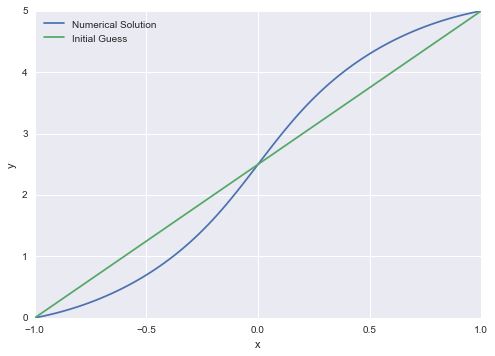

In [5]:
D, x = cheb(20)
c = lambda z : (-7 / 10) * (z**2 - 1)
alph = lambda z : (1 - c(z)**2)**(-.5)
domain = np.linspace(-1, 1, 101)

def f(y):
    dy = D.dot(y)
    sol = D.dot(alph(x)**3 * dy * (1 + (alph(x) * dy)**2)**(-.5) \
                - alph(x)**2 * c(x))
    sol[0] = y[0] - 5
    sol[-1] = y[-1]
    return sol

init = np.ones(21)
sol = fsolve(f, init)
estimation = bi(x, sol, domain)

plt.plot(domain, estimation, label='Numerical Solution')
plt.plot(domain, y(domain), label='Initial Guess')
plt.ylabel('y')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()

# Problem 4

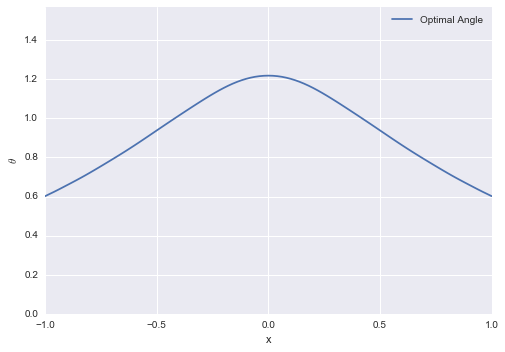

In [6]:
df = lambda z : c(x) / np.cos(z) + np.tan(z) - D.dot(sol)

init = np.ones(21)
sol2 = fsolve(df, init)
estimation2 = bi(x, sol2, domain)

plt.plot(domain, estimation2, label='Optimal Angle')
plt.ylim(0, np.pi/ 2)
plt.ylabel(r'$\theta$')
plt.xlabel('x')
plt.legend(loc='best')
plt.show()